In [ ]:
# Import the necessary modules
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate the data
data, _ = make_circles(n_samples=1000,
                       noise=0.05,
                       random_state=0)

In [20]:
# # Create an instance of the AgglomerativeClustering
# # class for the ward algorithm
# ward = AgglomerativeClustering(n_clusters=3,
#                                metric="cosine",
#                                linkage="ward")

# # Fit the ward algorithm to the data
# ward.fit(data)

# Create an instance of the AgglomerativeClustering
# class for the complete algorithm
complete = AgglomerativeClustering(n_clusters=3,
                                   metric="cosine",
                                   linkage="complete")

# Fit the complete algorithm to the data
complete.fit(data)

,n_clusters,3
,metric,'cosine'
,memory,None
,connectivity,None
,compute_full_tree,'auto'
,linkage,'complete'
,distance_threshold,None
,compute_distances,False


In [ ]:
# Get the cluster labels for each 
# data point using the ward algorithm
#ward_labels = ward.labels_

# Get the cluster labels for each 
# data point using the complete algorithm
complete_labels = complete.labels_

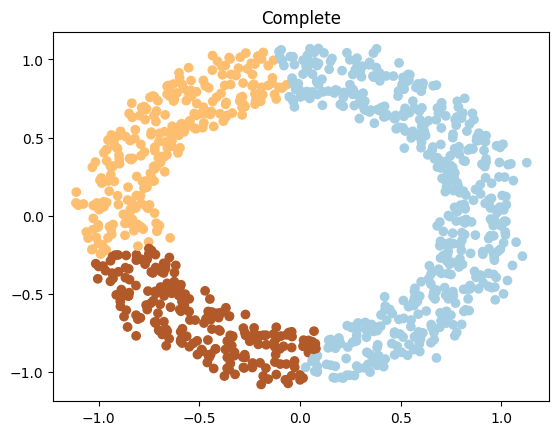

In [21]:
# Import the pyplot module
import matplotlib.pyplot as plt

# Plot the data points and the cluster
# labels using the ward algorithm
# plt.scatter(data[:, 0], data[:, 1],
#             c=ward_labels, cmap="Paired")
# plt.title("Ward")
# plt.show()

# Plot the data points and the cluster
# labels using the complete algorithm
plt.scatter(data[:, 0], data[:, 1],
            c=complete_labels, cmap="Paired")
plt.title("Complete")
plt.show()

In [ ]:
import os
import numpy as np
from langchain_ollama import OllamaEmbeddings
from sklearn.cluster import AgglomerativeClustering
from dataclasses import dataclass

# 1. Simulação do Objeto Document
@dataclass
class MockDoc:
    id: int
    title: str
    content: str # Simulando o texto curto

# 2. Nosso Golden Dataset (A "Gabarito")
raw_data = [
    # TEMA 1: Decisões do STF (Jurídico)
    MockDoc(1, "STF decide sobre marco temporal", "O Supremo Tribunal Federal retomou hoje o julgamento..."),
    MockDoc(2, "Ministros do Supremo votam lei indígena", "A votação no STF sobre as terras indígenas foi acirrada..."),
    MockDoc(3, "Decisão da corte suprema impacta agronegócio", "O julgamento do marco temporal no STF gera reações..."),

    # TEMA 2: Fraudes Financeiras (Crime/Compliance)
    MockDoc(4, "Golpe do Pix faz novas vítimas", "Quadrilhas usam engenharia social para roubar via Pix..."),
    MockDoc(5, "Aumento de fraudes bancárias digitais", "Bancos alertam para novos mecanismos de fraude no app..."),
    MockDoc(6, "Polícia prende quadrilha do Pix", "Operação desarticula grupo focado em roubo de chaves Pix..."),

    # TEMA 3: IA e Marketing (Tecnologia)
    MockDoc(7, "Como usar IA na criação de conteúdo", "Ferramentas como ChatGPT ajudam times de marketing..."),
    MockDoc(8, "Automação de posts com Inteligência Artificial", "O futuro do marketing digital passa pela IA generativa..."),

    # RUÍDO (Nada a ver)
    MockDoc(9, "Flamengo vence clássico no Maracanã", "Com gol no final, o time rubro-negro garantiu a vitória...")
]

def run_test(threshold=0.4):
    print(f"\n--- TESTANDO COM THRESHOLD (Sensibilidade): {threshold} ---")
    
    # A. Preparar Textos
    texts = [f"{d.title}\n{d.content}" for d in raw_data]
    
    # B. Gerar Embeddings
    print("Gerando Embeddings...")
    embeddings = OllamaEmbeddings(model="qwen3-embedding:4b").embed_documents(texts)
    matrix = np.array(embeddings)
    
    # C. Aplicar Clustering
    model = AgglomerativeClustering(
        n_clusters=None,
        distance_threshold=threshold, # O "botão" de calibragem
        metric='cosine',
        linkage='average'
    )
    labels = model.fit_predict(matrix)
    
    # D. Visualizar Resultado
    clusters = {}
    for doc, label in zip(raw_data, labels):
        if label not in clusters: clusters[label] = []
        clusters[label].append(doc.title)
        
    # E. Imprimir Relatório
    for label, titles in clusters.items():
        print(f"\nCLUSTER {label} ({len(titles)} docs):")
        for t in titles:
            print(f"  - {t}")

# Rode o teste!

# Teste 1: Sensibilidade média (Recomendado)
run_test(threshold=0.4)

# Teste 2: Muito rigoroso (Tende a separar tudo)
# run_test(threshold=0.15)

# Teste 3: Muito permissivo (Tende a misturar tudo)
# run_test(threshold=0.8)


--- TESTANDO COM THRESHOLD (Sensibilidade): 0.4 ---
Gerando Embeddings...


OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable